# Flow past objects
## Ideal fluid - d'Alembert's paradox
In ideal fluid there are no forces acting on a body subjected to steady, uniform flow. This is known as d'Alembert's paradox. It is called a paradox, since it obviously contraticts reality, as from experiment we know that objects in a steady flow will experience hydrodynamic forces. Consider a cylinder in steady, uniform cross-flow.
<div>
<img src="Figures/Cross_flow.PNG" width="600">
</div>
The figure illustrates a circular cylinder of diameter $D=2R$, subjected to the steady, uniform flow $U$ in the positive $x$-direction. The velocity potential is composed of a uniform flow potential $\phi_1=Ux$, and a dipole potential with axis in the negative $x$-direction $\phi_2=\frac{m}{2\pi}\frac{x}{r^2}$. From the definition of variables in the above figure, we see that $x=-r\cos(\theta)$. By requiring a stagnation point at the sylinder surface, $r=R$ and $\theta=0$, the dipole strength $m$ is found to be $m=2\pi UR$ The total velocity potential in polar coordinates then becomes
$$\phi=-Ur\cos\theta-UR^2\frac{\cos\theta}{r}$$
When we know the velocity potential, we can compute the hydrodynamic pressure from Bernoulli's equation.
$$p_0+\frac{1}{2}\rho U^2=p+\frac{1}{2}\rho |\nabla\phi|^2$$
On the surface of the cylinder, we have that $u_r=\frac{\partial\phi}{\partial r}=0$, i.e. there is no flow through the boundary. Further, the tangential velocity on the cylinder surface is $u_{\theta}=\frac{1}{R}\frac{\partial\phi}{\partial \theta}=2U\sin\theta$. Hence, we have $\nabla\phi=[\frac{\partial\phi}{\partial r}, \frac{1}{R}\frac{\partial\phi}{\partial\theta}]=[0, 2U\sin\theta]$ on the cylinder surface.
The pressure on the cylinder surface is then found as
$$p=p_0+\frac{1}{2}\rho U^2-2\rho U^2\sin^2(\theta)$$
The pressure coefficient is defined as
$$C_p=\frac{p-p_0}{\frac{1}{2}\rho U^2}=1-4\sin^2\theta$$
Let us have a look at the pressure coefficient on the cylinder surface.

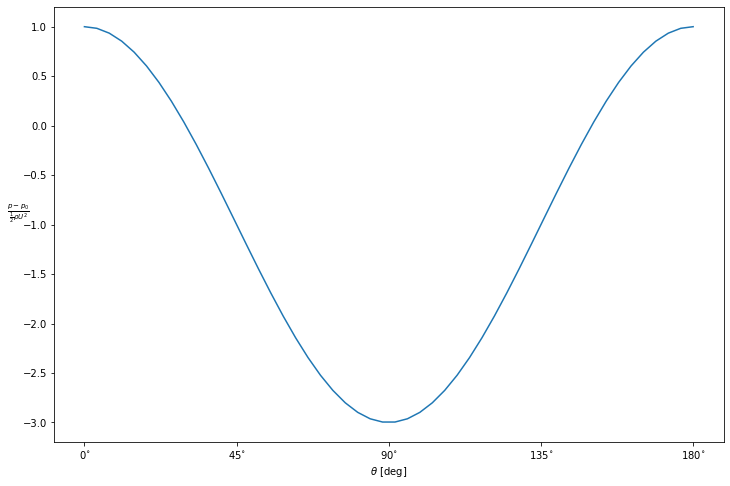

In [1]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi)
cp = 1.0 - 4.0*np.sin(theta)**2

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.plot(theta*180/np.pi, cp)
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xticks([0, 45, 90, 135, 180])
labels = [str(item)+'$^{\circ}$' for item in ax.get_xticks()]
ax.set_xticklabels(labels)
ax.set_ylabel(r'$\frac{p-p_0}{\frac{1}{2}\rho U^2}$', rotation=0)
plt.rcParams.update({'font.size': 16})

We see from the above figure that the pressure distribution is symmetric about $x$- and $y$-axis, which means there is no net force acting on the cylinder in ideal fluid.

## Viscous drag and lift on a circular cylinder
Consider a circular cylinder in transverse uniform flow. When Reynolds number is sufficiently large ($Rn>40$) vortex shedding will occur. Periodic shedding of vortices occur for a broad range of Reynolds numbers, and forms a so-called von Karman vortex street as shown below. 
<div>
<img src="Figures/CircularCylRn100.PNG" width="600">
</div>
Vortex shedding create alternating circulation around the cylinder, and hence according to Kutta-Joukowski, an alternating lift force. In other words, the lift force changes sign. This also leads to an oscillatory component of the drag force, although the total drag force does not change sign but is always in-line with the flow direction. The oscillatory lift and drag force components are not modelled by the Morison's equation. The alternating shedding of vortices from the cylinder surface forms the characteristic wake known as von Karman vortex street.

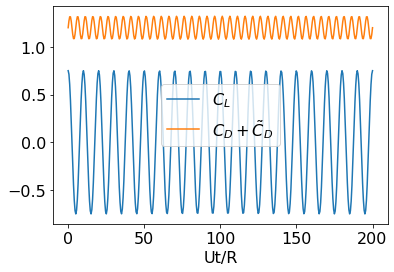

In [2]:
U = 1.0 # [m/s] Incident current speed
D = 0.1 # [m]   Cylinder diameter

cl_a = 0.75 # Amplitude of oscillatory lift coefficient
cd_m = 1.2  # Mean drag coefficient
cd_a = 0.1*cd_m # Amplitude of oscillatory drag coefficient

St = 0.2 # Strouhal number

fv = St*U/D # [Hz] Vortex shedding frequency

omg = 2*np.pi*fv # [rad/s] Vortex shedding angular frequency

tvec = np.linspace(0, 20/fv, 400)
cl = cl_a*np.cos(omg*tvec)
cd = cd_m + cd_a*np.sin(2*omg*tvec)

plt.figure()
plt.plot(2*U/D*tvec, cl, label=r'$C_L$')
plt.plot(2*U/D*tvec, cd, label=r'$C_D+\tilde{C}_D$')
plt.xlabel(r'Ut/R')
plt.legend()


### Reflections:
* Where is the viscous flow past a circular cylinder similar to the potential flow solution?
* Why does the drag oscillate with double frequency compared to the lift force?
* What is the pressure at point of the upstream side of the cylinder where the velocity is zero, relative to the pressure far upstream?

# Wave-loads on large volume structures
Consider a vertical bottom mounted and surface piercing circular cylinder. When the incident wave lengths are of comparable length as the cylinder diameter, or smaller, diffraction effects matter. MacCamy and Fuchs solved the linear boundary value problem of a vertical cylinder in waves, governed by the Laplace equation and linear free surface condition.
By expressing the BVP in cylinder coordinates, the partial differential equation is separable, and three ODE's are obtained. The radial depence of the problem is described by Bessel's differential equation, which solution are Bessel functions of the first and second kind. Bessel functions are special functions used to describe the radial dependency of the amplitude of "ring"-waves. These are special mathematical functions that can be found in the *scipy.special* library in python. Let us have a look. 

(-1.0, 1.0)

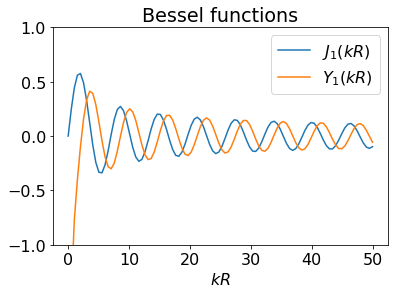

In [11]:
from scipy.special import j1, y1  # Import Bessel functions of the first and second kind, of order 1

ka = np.linspace(0.0001, 50., 100)

fig2=plt.figure()
ax = fig2.add_subplot()
ax.plot(ka, j1(ka), label=r'$J_1(kR)$')
ax.plot(ka, y1(ka), label=r'$Y_1(kR)$')
ax.set_xlabel(r'$kR$')
ax.legend()
ax.set_title('Bessel functions')
ax.set_ylim(ymin=-1, ymax=1)


According to MacCamy and Fuchs theory, the total wave force on a vertical cylinder is given by the expression
$$F=\frac{2\rho g H}{k^2}\tanh(kh)A(ka)\cos(\omega t - \alpha)$$
where $H$ is wave height, $k$ is wave number, $a$ is cylinder radius, $h$ is water depth (height of cylinder), $\omega$ is wave frequency and $\alpha$ is a phase angle. Further, the wavenumber-dependent constant $A(ka)$ is given by
$$A(ka)=\frac{1}{\sqrt{(J'_1(ka))^2+(Y'_1(ka))^2}}$$
where primes denote the first order derivative of the bessel functions. How to compute the wave number at finite water depth for a given wave frequency was shown in the notebook from [Lecture 2](Lecture_2.ipynb). Let us compute the wave excitation force on a pile (vertical circular cylinder) from MacCamy Fuchs theory.

In [4]:
from scipy.special import jvp, yvp # Import method to compute derivative of Bessel functions of first and second kind. Usage: jvp(v, x, n) where v is order of bessel function, x is the varible (real or complex) and n is order of derivative (default=1)
import airywavelib as airy  # Our own wave library

def ampfunc(ka):
    return 1.0/np.sqrt(jvp(1, ka)**2+yvp(1, ka)**2)

def waveforce(waveper, waveamp, diameter, depth):
    
    # Constants
    rho = 1000.    # [kg/m^3]
    gravity = 9.81 # [m/s^2]
    
    H = 2*waveamp
    omg = 2*np.pi/waveper
    k = airy.findWaveNumber(omg)
    ka = 0.5*diameter*k
    
    F = 2*rho*gravity*H/k**2*np.tanh(k*depth)*ampfunc(ka)
    
    alpha = np.arctan2(jvp(1, ka),yvp(1, ka))
    
    return F, alpha



D = 4. # [m]
h = 20. # [m]
zetaA = 0.25 # [m]
T = 1.5     # [s]
omg = 2*np.pi/T

F, alpha = waveforce(T, zetaA, D, h)
print("Wave force amplitude: F_A = {:.03} kN".format(F/1000.))
print("Wave force phase angle: alpha = {:.03} deg".format(alpha*180./np.pi))

Wave force amplitude: F_A = 7.29 kN
Wave force phase angle: alpha = -84.4 deg


## Diffraction waves for large volume circular cylinder
We will now look at the wave field surrounding the vertical cylinder, which is composed of the incident wave and the waves diffracted from the cylinder. MacCamy and Fuchs theory yields the linear potential flow solution to the diffraction problem. The expression describing the free surface elevation of the diffracted waves is given in terms of special functions, as well as so-called complex numbers (which you will learn in later math courses). Hence, the theory implemented below is not part of the curriculum, but may serve as an inspiration. 

In [5]:
from scipy.special import j0, y0 # Bessel functions of the first and second kind and order zero.
from scipy.special import jv, yv # Bessel functions of integer order
from scipy.special import hankel2, h2vp # Hankel functions of second kind and derivative function


class largevolumecylinder:
    def __init__(self, diameter, incidentwave):
        """
        Class to compute wave diffraction problem of large volume circular cylinder 
        based on MacCamy and Fuchs theory. The cylinder is assumed to be vertical, 
        bottom mounted and surface piercing.
        
        Input params:
        diameter [m] # Cylinder diameter
        incidentwave [Class instance] of linear airy wave.
        """
        
        self.R = 0.5*diameter
        
        # Incident wave parameters:
        self.A = incidentwave.A
        self.omg = incidentwave.omega
        self.k = incidentwave.k

        self.g = incidentwave.g
        self.rho = incidentwave.rho
        self.h = incidentwave.h
        
        self.nummodes = 50

        
    def getWavefield(self, rvec, theta, t):
        '''
        Compute surface elevation due to incident and diffracted waves.
        
        Input parameters:
        rvec [m] - radial coordinate of point to compute the wave elevation
        theta  [rad] - angular (azimuth) coordinate to compute the wave elevation
        t [s] - time parameter for evaluation of the wave elevation
        
        Return:
        zeta [m] - Wave elevation at given point on the free surface and at given time
        '''
        
        kR = self.k*self.R
        kr = self.k*rvec
        
        # Compute surface elevation using complex numbers (1.0j is the imaginary unit)
        tmp = 0
        for m in range(1, self.nummodes+1):
            tmp += 1.0j**m * (jv(m, kr) - jvp(m, kR)/h2vp(m, kR)*hankel2(m, kr))*np.cos(m*theta)
        
        zeta = -1.0j*self.A * (j0(kr) - jvp(0, kR)/h2vp(0, kR)*hankel2(0, kr) + 2.0*tmp)*np.exp(-1.0j*self.omg*t)
        
        return np.real(zeta) # Return real part of complex number (only the real part has physical meaning)
    
    def getSectionalWaveforce(self, z, t):
        '''
        Compute horizontal in-line 2D wave force on cylinder strip/disc element.
        
        Input parameters:
        z [m] - vertical coordinate of cylinder strip (disc) to compute wave force
        theta  [rad] - angular (azimuth) coordinate to compute the wave elevation
        t [s] - time parameter for evaluation of the wave elevation
        
        Return:
        zeta [m] - Wave elevation at given point on the free surface and at given time
        '''        
        # Test validity of input parameter
        assert (z < 0 and z>-self.h), "z-value out of range"
    
        kR = self.k*self.R
        kh = self.k*self.h
        tmp = 1.0/np.sqrt(jvp(1, kR)**2+yvp(1, kR)**2)
        alpha = np.arctan(jvp(1, kR)/yvp(1, kR))
    
        Fx = 4*self.rho*self.g*self.A/k * np.cosh(k*(z+self.h))/np.cosh(kh)*tmp*np.sin(self.omg*t-alpha)
        return Fx

    def getTotalWaveforce(self, t):
        '''
        Compute total horizontal in-line wave force on cylinder.
        
        Input parameters:
        t [s] - time parameter for evaluation of the wave force
        
        Return:
        Fx [N] - Wave force on cylinder at given time instant
        '''        

        kR = self.k*self.R
        kh = self.k*self.h
        tmp = 1.0/np.sqrt(jvp(1, kR)**2 + yvp(1, kR)**2)
        alpha = np.arctan2(jvp(1, kR),yvp(1, kR))
    
        Fx = 4*self.rho*self.g*self.A/self.k**2*np.tanh(kh)*tmp*np.sin(self.omg*t-alpha)
        return Fx
    
    def getOverturningMoment(self, t):
        
        # Compute total force on cylinder
        Fx = self.getTotalWaveforce(t)
        
        # Compute lever arm
        kh = self.k*self.h
        R = self.h*(kh*np.sinh(kh)-np.cosh(kh)+1)/(kh*np.sinh(kh))
        
        return R*Fx


Let us plot some time-series of the incident wave and resulting wave force on the cylinder.

T: 1.5, A: 0.25, h: 20.0, g: 9.81, rho: 1000.0, omega: 4.1887902047863905, k0: 1.7885793455366372, l0: 3.5129474813958605, k: 1.7885793455366372, wavelen: 3.5129474813958605, steepness: 0.14233062197711147


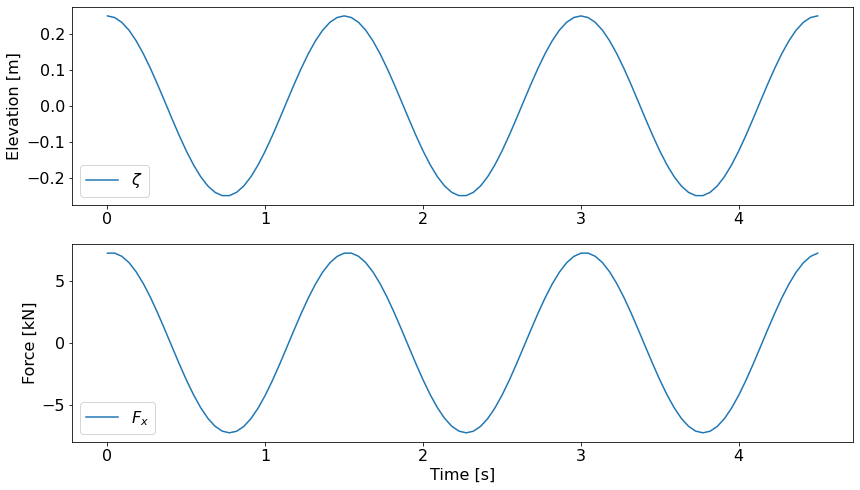

In [6]:
from matplotlib import gridspec

tvec = np.linspace(0, 3*T, 100)

incidentWave = airy.airywave(T, zetaA, waterDepth=h)
k = incidentWave.k

# Print parameters of the wave class object:
attrs = vars(incidentWave)
print(', '.join("%s: %s" % item for item in attrs.items()))

cyl1 = largevolumecylinder(D, incidentWave)

zeta = lambda t: incidentWave.getSurfaceElevation(0, t)
Fx = lambda t: cyl1.getTotalWaveforce(t)

tvec = np.linspace(0, 3.*T, 100)

# Plot results
gs = gridspec.GridSpec(nrows=2, ncols=1)
fig3 = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax1 = fig3.add_subplot(gs[0,0])
ax1.plot(tvec, zeta(tvec), label=r'$\zeta$')
ax1.legend()
ax1.set_ylabel('Elevation [m]')

ax2 = fig3.add_subplot(gs[1,0])
ax2.plot(tvec, Fx(tvec)*10**(-3), label=r'$F_x$')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Force [kN]')
ax2.legend()


T: 1.5, A: 0.25, h: 20.0, g: 9.81, rho: 1000.0, omega: 4.1887902047863905, k0: 1.7885793455366372, l0: 3.5129474813958605, k: 1.7885793455366372, wavelen: 3.5129474813958605, steepness: 0.14233062197711147


C:\Users\davidkr\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


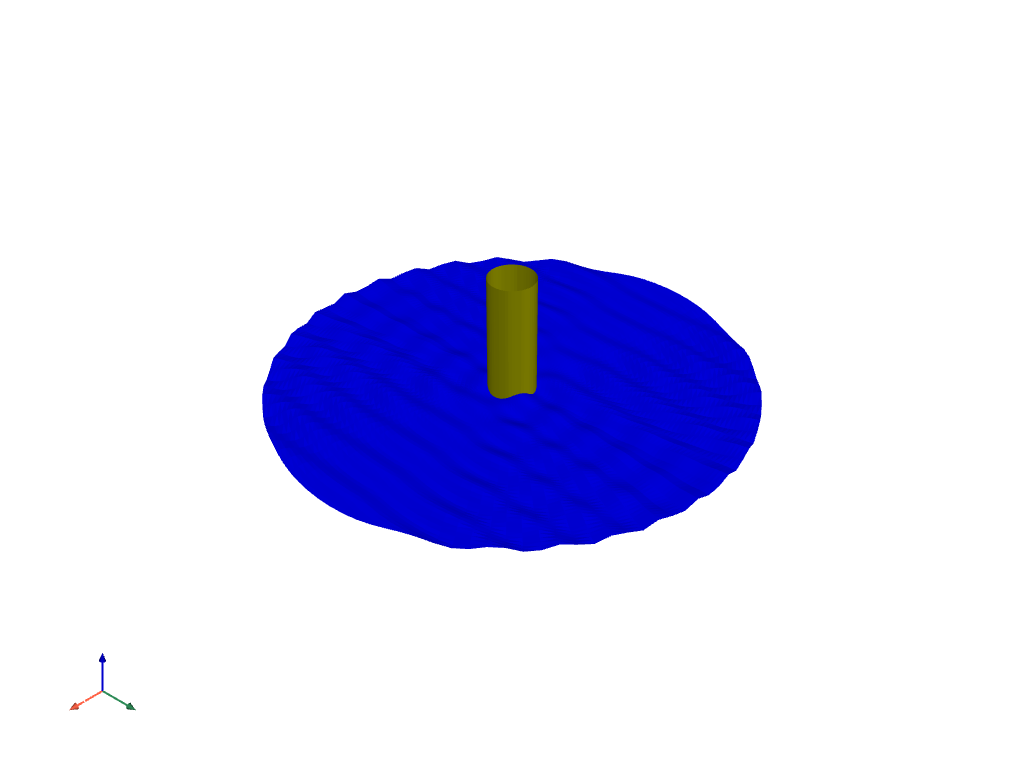

In [8]:
import pyvista as pv
#pv.global_theme.jupyter_backend = 'ipyvtklink'

# Incident wave
incidentWave = airy.airywave(T, zetaA, waterDepth=h)
k = incidentWave.k

# Print parameters of the wave class object:
attrs = vars(incidentWave)
print(', '.join("%s: %s" % item for item in attrs.items()))

# Create surface mesh
# Polar coordinates
rvec = np.linspace(0.5*D, 5*D, 50)
thetavec = np.linspace(0, 2.*np.pi, 100)
rv, thv = np.meshgrid(rvec, thetavec)

# Cartesian coordinates
X = rv*np.cos(thv)
Y = rv*np.sin(thv)

# Make an instance of our new class:
cyl = largevolumecylinder(D, incidentWave)

# Get wave total wave elevation based on MacCamy and Fuchs teory as function f(t)
waveElevation = lambda t: cyl.getWavefield(rv, thv, t)


# Mesh cylinder:
phi = np.linspace(0., 2.*np.pi, 50)
z = np.linspace(-10, 10, 50)
Phi, Zs = np.meshgrid(phi, z)
R = 0.5*D
Xs = R * np.cos(Phi)
Ys =  R * np.sin(Phi)
cylmesh = pv.StructuredGrid(Xs, Ys, Zs)


# Mesh wavefield:
oceanmesh = pv.StructuredGrid(X, Y, waveElevation(0))


# Merge meshes
plotter = pv.Plotter()
ocean = plotter.add_mesh(oceanmesh, color='blue')
cylinder = plotter.add_mesh(cylmesh, color='yellow')
plotter.add_axes()
plotter.set_background(color='white')

plotter.show()



In [9]:
# Create animation:
#plotter = pv.Plotter()
# Open a movie file
#plotter.open_movie("MacCamy_Fuchs.mp4")

# Add initial mesh
#plotter.show(auto_close=False)  # only necessary for an off-screen movie

# Run through each frame
#plotter.write_frame()  # write initial data

# Create time vector
#tvec = np.linspace(0,2*T, 100)

# Update scalars on each frame
#for i, itime in enumerate(tvec):
#    plotter.update_coordinates(pv.StructuredGrid(X, Y, waveElevation(itime)), mesh=ocean)
#    plotter.add_text("Time: {}s".format(tvec[i]))
#    plotter.write_frame()  # Write this frame

# Be sure to close the plotter when finished
#plotter.close()

## Comparison of MacCamy Fuchs and Morison
Let us compare the mass term in Morison's equation with the force term of MacCamy Fuchs proportional to fluid particle acceleration. As given previously, the total wave force on a vertical cylinder is given by the expression
$$F_x=\frac{2\rho g H}{k^2}\tanh(kh)A(ka)\cos(\omega t - \alpha)$$
or, using the dispersion relation $\omega^2/k=g\tanh(kh)$ to make a substitution 
$$F_x=\frac{2\rho H}{k^2}\frac{\omega^2}{k}A(ka)\cos(\omega t - \alpha)$$
We can write this as
$$F_x=\frac{2\rho H}{k^2}\frac{\omega^2}{k}A(ka)\left[\cos(\alpha)\cos(\omega t) + \sin(\alpha)\sin(\omega t)\right]$$
where the first term is in phase with the particle acceleration.
Mass term of Morison's equation reads
$$dF_x=\rho \frac{\pi D^2}{4}C_M \omega^2\zeta_a\cos(\omega t)\mathrm{e}^{kz}\mathrm{d}z$$
Here we have assumed deep water where the particle acceleration is $a_x(z)=\omega^2\zeta_a\exp(kz)\cos(\omega t)$. Integrating over the height of the cylinder, we obtain the force expression: 
$$F_x=\rho \frac{\pi D^2}{4}C_M \frac{\omega^2}{k}\zeta_a\cos(\omega t)$$
We now want to find an equivalent mass coefficient $C_M^{eqv.}$ such that
$$C_M^{eqv.}\left(\rho\frac{\pi D^2}{4}\frac{\omega^2}{k} \zeta_a\right)=\frac{2\rho H}{k^2}\frac{\omega^2}{k}A(ka)\cos(\alpha)$$
Hence,
$$C_M^{eqv.}=\frac{4}{\pi(kR)^2}A(kR)\cos(\alpha)$$

(0.0, 1.5745)

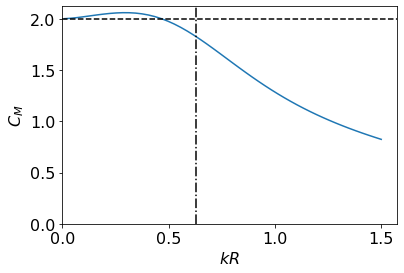

In [26]:
#Plotting the result above  yields
kR = np.linspace(0.01,1.5)
ldD = np.pi/(kR)
Amp = 1.0/np.sqrt(jvp(1, kR)**2+yvp(1, kR)**2)
alpha = np.arctan2(jvp(1, kR),yvp(1, kR))
Cm_ekv = 4.0/(np.pi*kR**2)*Amp*np.cos(alpha)

# limit lambda/D=5 => kR=pi/5
kR_lim = np.pi/5.0

plt.figure()
plt.plot(kR, Cm_ekv)
plt.axhline(2.0, linestyle='--', color='k')
plt.axvline(kR_lim, linestyle='-.', color='k')
plt.xlabel(r'$kR$')
plt.ylabel(r'$C_M$')
plt.ylim(ymin=0)
plt.xlim(xmin=0)

## Example: Wave force and moment on circular storage tank
Consider a 70 m tall circular storage tank of radius $R=40$ m standing on the sea-bed at water depth $h=50$ m. The tank is subjected to a regular wave with wave height $H=10$ m and period $T=12$ s. What is the wave force and overturning moment acting on the storage tank?

Let us apply our implementation of linear wave theory and MacCamy Fuchs theory.

In [10]:
D = 2*40. # [m] Diameter
h = 50. # [m] Water depth

T = 12. # [s] Wave period
H = 10. # [m] Wave height

# Initiate wave:
wave1 = airy.airywave(T, 0.5*H, waterDepth=h)

# Print parameters of the wave class object:
attrs = vars(wave1)
print("Wave instance params:")
print(', '.join("%s: %s" % item for item in attrs.items()))


print("Wave number is k={:.03} m^-1".format(wave1.k))
print("Wave length is l={:.03} m^-1".format(2*np.pi/wave1.k))

# Check if MacCamy Fuchs theory applies - if we have a large volume structure
# Wavelength to diameter ratio must be smaller than 5:
print("lambda/D = {:.02}".format(2*np.pi/(D*wave1.k)))

# Make an instance of our cylinder class:
tank = largevolumecylinder(D, wave1)

# Print parameters of the cylinder class object:
attrs = vars(tank)
print("Tank instance params:")
print(', '.join("%s: %s" % item for item in attrs.items()))


# Create time-vector:
tvec = np.linspace(0, T, 50)

# Compute force amplitude
Fx_a = np.max(tank.getTotalWaveforce(tvec))

print("Force amplitude: Fx_a= {:.3} MN".format(Fx_a*10**(-6)))

# Compute overturning moment
M_a = np.max(tank.getOverturningMoment(tvec))

print("Moment amplitude: M_a= {:.3} MNm".format(M_a*10**(-6)))

Wave instance params:
T: 12.0, A: 5.0, h: 50.0, g: 9.81, rho: 1000.0, omega: 0.5235987755982988, k0: 0.027946552274009957, l0: 224.82863880933508, k: 0.030675109864108988, wavelen: 204.8300832503666, steepness: 0.04882095364759904
Wave number is k=0.0307 m^-1
Wave length is l=2.05e+02 m^-1
lambda/D = 2.6
Tank instance params:
R: 40.0, A: 5.0, omg: 0.5235987755982988, k: 0.030675109864108988, g: 9.81, rho: 1000.0, h: 50.0, nummodes: 50
Force amplitude: Fx_a= 2.45e+02 MN
Moment amplitude: M_a= 7.1e+03 MNm
